# Predicting a match winner 
(Multiclass classification problem)

Importing libraries

In [356]:
import os
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Writing paths and variables

In [357]:
data_path = "Botola_Forecasting/"

data_matches = "morocco-botola-pro-matches"
data_teams = "morocco-botola-pro-teams"

data_years = [2014,2015,2016,2017,2018,2019,2020]


Selecting years of data

In [358]:
data_matches_selected = []

for filename in os.listdir(data_path):
    file_path = data_path + filename
    if data_matches in filename:
        if filename[-14:-10] in str(data_years):
            df = pd.read_csv(file_path)
            df['season'] = filename[-14:-10] # adding season to each df
            data_matches_selected.append(df)


In [359]:
data_teams_selected = []

for filename in os.listdir(data_path):
    file_path = data_path + filename
    if data_teams in filename:
        if filename[-14:-10] in str(data_years):
            df = pd.read_csv(file_path)
            data_teams_selected.append(df)

Concatenate data over years

In [360]:
data_matches = pd.concat(data_matches_selected)
data_matches.date_GMT = pd.to_datetime(data_matches.date_GMT,format='%b %d %Y - %I:%M%p',errors='coerce')
data_matches = data_matches.reset_index()


In [361]:
data_teams = pd.concat(data_teams_selected)
data_matches.head()

,index,timestamp,date_GMT,status,attendance,home_team_name,away_team_name,referee,Pre-Match PPG (Home),Pre-Match PPG (Away),...,odds_ft_draw,odds_ft_away_team_win,odds_ft_over15,odds_ft_over25,odds_ft_over35,odds_ft_over45,odds_btts_yes,odds_btts_no,stadium_name,season
0,0,1377280800,2013-08-23 18:00:00,complete,NaN,FAR Rabat,FUS Rabat,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Stade Prince Moulay Abdallah,2014
1,1,1377360000,2013-08-24 16:00:00,complete,NaN,AS Salé,Hassania Agadir,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Stade Boubker Ammar,2014
2,2,1377446400,2013-08-25 16:00:00,complete,NaN,RSB Berkane,Moghreb Tétouan,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Stade d'Honneur d'Oujda,2014
3,3,1377453600,2013-08-25 18:00:00,complete,NaN,Raja Casablanca,Olympic Safi,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Stade Mohamed V,2014
4,4,1377460800,2013-08-25 20:00:00,complete,NaN,Chabab Rif Hoceima,Maghreb Fès,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Stade Mimoun Al Arsi,2014


In [362]:
data_teams.head()

,team_name,common_name,season,country,matches_played,matches_played_home,matches_played_away,suspended_matches,wins,wins_home,...,goals_scored_min_81_to_90,goals_conceded_min_0_to_10,goals_conceded_min_11_to_20,goals_conceded_min_21_to_30,goals_conceded_min_31_to_40,goals_conceded_min_41_to_50,goals_conceded_min_51_to_60,goals_conceded_min_61_to_70,goals_conceded_min_71_to_80,goals_conceded_min_81_to_90
0,Wydad Athletic Club,Wydad Casablanca,2013/2014,Morocco,30,15,15,0,10,7,...,0,0,0,0,0,0,0,0,0,0
1,Hassania Union Sport d'Agadir,Hassania Agadir,2013/2014,Morocco,30,15,15,0,10,9,...,0,0,0,0,0,0,0,0,0,0
2,AS Forces Armées Royales de Rabat,FAR Rabat,2013/2014,Morocco,30,15,15,0,9,5,...,0,0,0,0,0,0,0,0,0,0
3,Olympique Club de Khouribga,Khouribga,2013/2014,Morocco,30,15,15,0,8,6,...,0,0,0,0,0,0,0,0,0,0
4,Olympique Club de Safi,Olympic Safi,2013/2014,Morocco,30,15,15,0,7,6,...,0,0,0,0,0,0,0,0,0,0


Merge matches and teams dataframes

In [363]:
data_teams.season = data_teams.season.apply(lambda x: x[-4:]) # matching saeson formats

In [364]:
data_matches.columns

Index(['index', 'timestamp', 'date_GMT', 'status', 'attendance',
       'home_team_name', 'away_team_name', 'referee', 'Pre-Match PPG (Home)',
       'Pre-Match PPG (Away)', 'home_ppg', 'away_ppg', 'home_team_goal_count',
       'away_team_goal_count', 'total_goal_count', 'total_goals_at_half_time',
       'home_team_goal_count_half_time', 'away_team_goal_count_half_time',
       'home_team_goal_timings', 'away_team_goal_timings',
       'home_team_corner_count', 'away_team_corner_count',
       'home_team_yellow_cards', 'home_team_red_cards',
       'away_team_yellow_cards', 'away_team_red_cards',
       'home_team_first_half_cards', 'home_team_second_half_cards',
       'away_team_first_half_cards', 'away_team_second_half_cards',
       'home_team_shots', 'away_team_shots', 'home_team_shots_on_target',
       'away_team_shots_on_target', 'home_team_shots_off_target',
       'away_team_shots_off_target', 'home_team_fouls', 'away_team_fouls',
       'home_team_possession', 'away_team_p

In [365]:
matches_columns = ['date_GMT', 'season', 'status', 'home_team_name', 'away_team_name','home_team_goal_count','away_team_goal_count','average_goals_per_match_pre_match','average_cards_per_match_pre_match', 'stadium_name']

matches_columns = list(set(matches_columns))
data_matches = data_matches[matches_columns]

In [366]:
teams_columns =[
 'average_possession',
 'average_total_goals_per_match',
 'average_total_goals_per_match_away',
 'average_total_goals_per_match_home',
 'clean_sheet_percentage',
 'clean_sheet_percentage_away',
 'clean_sheet_percentage_home',
 'common_name',
 'draws',
 'draws_away',
 'draws_home',
 'goals_conceded_away',
 'goals_conceded_home',
 'goals_conceded_per_match',
 'goals_conceded_per_match_away',
 'goals_conceded_per_match_home',
 'goals_scored_away',
 'goals_scored_home',
 'goals_scored_per_match',
 'goals_scored_per_match_away',
 'goals_scored_per_match_home',
 'league_position',
 'losses',
 'losses_away',
 'losses_home',
 'points_per_game',
 'points_per_game_away',
 'points_per_game_home',
 'season',
 'shots_on_target',
 'total_goal_count',
 'total_goal_count_away',
 'total_goal_count_home',
 'win_percentage',
 'win_percentage_away',
 'win_percentage_home',
 'wins',
 'wins_away',
 'wins_home'

 ]

teams_columns = list(set(teams_columns))
data_teams = data_teams[teams_columns]

In [367]:
data = pd.merge(data_matches, data_teams,  how='left', left_on=['season','home_team_name'], right_on = ['season','common_name'])
data = pd.merge(data, data_teams, suffixes = ('_home', '_away'), how='left', left_on=['season','away_team_name'], right_on = ['season','common_name'])
data


,season,home_team_goal_count,average_cards_per_match_pre_match,away_team_name,status,home_team_name,stadium_name,date_GMT,average_goals_per_match_pre_match,away_team_goal_count,...,losses_away_away,points_per_game_away_away,wins_home_away,average_total_goals_per_match_away,goals_scored_per_match_away_away,goals_scored_per_match_home_away,win_percentage_home_away,draws_home_away,goals_conceded_away_away,clean_sheet_percentage_away
0,2014,0,0.00,FUS Rabat,complete,FAR Rabat,Stade Prince Moulay Abdallah,2013-08-23 18:00:00,0.00,1,...,5,1.33,7,1.77,1.13,1.00,47,7,14,47
1,2014,2,0.00,Hassania Agadir,complete,AS Salé,Stade Boubker Ammar,2013-08-24 16:00:00,0.00,2,...,8,0.60,9,2.63,0.73,1.67,60,2,23,20
2,2014,0,0.00,Moghreb Tétouan,complete,RSB Berkane,Stade d'Honneur d'Oujda,2013-08-25 16:00:00,0.00,1,...,4,1.67,9,2.03,1.27,1.13,60,6,19,40
3,2014,1,0.00,Olympic Safi,complete,Raja Casablanca,Stade Mohamed V,2013-08-25 18:00:00,0.00,1,...,7,0.67,6,1.93,0.87,1.00,40,5,18,27
4,2014,1,0.00,Maghreb Fès,complete,Chabab Rif Hoceima,Stade Mimoun Al Arsi,2013-08-25 20:00:00,0.00,2,...,8,0.87,4,2.10,0.80,1.00,27,6,19,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1675,2020,0,5.12,FUS Rabat,incomplete,Hassania Agadir,NaN,2020-09-26 19:00:00,2.09,0,...,3,1.23,6,2.00,1.00,1.20,60,2,12,35
1676,2020,0,5.14,Mouloudia Oujda,incomplete,CR Khemis Zemamra,NaN,2020-09-27 17:00:00,2.50,0,...,2,1.17,8,2.08,1.08,1.38,62,3,11,28
1677,2020,0,4.42,Rapide Oued Zem,incomplete,Raja Casablanca,NaN,2020-09-27 19:00:00,1.80,0,...,7,0.75,4,1.67,0.58,1.08,33,6,11,38
1678,2020,0,5.12,RSB Berkane,incomplete,Raja Beni Mellal,NaN,2020-09-27 19:00:00,1.55,0,...,1,1.70,6,1.73,0.50,1.42,50,5,6,50


Different teams that played in the selected years

In [368]:
teams = data_teams.common_name.unique()
print("{} team played in 1st div in {}".format(len(teams),list(data_years)))
for team in teams:
    print("-> ",team)

26 team played in 1st div in [2014, 2015, 2016, 2017, 2018, 2019, 2020]
->  Wydad Casablanca
->  Hassania Agadir
->  FAR Rabat
->  Khouribga
->  Olympic Safi
->  Raja Casablanca
->  Kawkab Marrakech
->  Difaâ El Jadida
->  Moghreb Tétouan
->  RSB Berkane
->  Chabab Rif Hoceima
->  FUS Rabat
->  KAC Kénitra
->  Maghreb Fès
->  AS Salé
->  Wydad Fès
->  Chabab Atlas Khénifra
->  Ittihad Khemisset
->  Ittihad Tanger
->  Mouloudia Oujda
->  Kasba Tadla
->  Racing de Casablanca
->  Rapide Oued Zem
->  Youssoufia Berrechid
->  Raja Beni Mellal
->  CR Khemis Zemamra


Adding useful features

In [369]:
# Final result feature

def result(row):
    if row.home_team_goal_count > row.away_team_goal_count:
        return 1
    elif row.home_team_goal_count < row.away_team_goal_count:
        return 2
    else:
        return 0

# Count of wins of the home team against the away team

def away_wins_vs(row):
    return len(  data[  ( (data.result == 1) & (data.home_team_name == row.away_team_name) & (data.away_team_name == row.home_team_name)  ) 
                | ((data.result == 2) & (data.home_team_name == row.home_team_name) & (data.away_team_name == row.away_team_name)) ] )

# Count of wins of the away team against the home team

def home_wins_vs(row):
    return len(  data[  ( (data.result == 1) & (data.home_team_name == row.home_team_name) & (data.away_team_name == row.away_team_name)  ) 
                | ((data.result == 2) & (data.home_team_name == row.away_team_name) & (data.away_team_name == row.home_team_name)) ] )

# Count of wins in n last matches ( n=0 : all matches )

def last_matches_wins(date,team,n):
    df = data[ ((data.home_team_name == team) | (data.away_team_name == team)) & (data.date_GMT < date) & (data.status == 'complete') ][-n:]
    return len( df[ (df.home_team_name == team) & (df.result == 1) ] ) + len( df[ (df.away_team_name == team) & (df.result == 2) ] ) 
    
# Count of draws the playing teams

def draws_vs(row):
        return len( data[(data.result==0) & ((data.home_team_name==row.home_team_name) & (data.away_team_name==row.away_team_name))])+len( data[(data.result==0) & ((data.home_team_name==row.away_team_name) & (data.away_team_name==data.home_team_name))])


data['result'] = data.apply(result,axis=1)
data['home_wins_vs'] = data.apply(home_wins_vs,axis=1)
data['away_wins_vs'] = data.apply(away_wins_vs,axis=1)
data['draws_vs']=data.apply(draws_vs,axis=1)


In [370]:
last_matches_wins('2020-12-12 17:30:00','Raja Casablanca',5)


3

In [371]:
data['home_last_5'] = 0
data['away_last_5'] = 0
for i in range(len(data)):
    h = last_matches_wins(data.iloc[i].date_GMT,data.iloc[i].home_team_name,10)
    a = last_matches_wins(data.iloc[i].date_GMT,data.iloc[i].away_team_name,10)
    data.at[i,'home_last_5'] = h
    data.at[i,'away_last_5'] = a

In [372]:
data['home_last_all'] = 0
data['away_last_all'] = 0
for i in range(len(data)):
    h = last_matches_wins(data.iloc[i].date_GMT,data.iloc[i].home_team_name,0)
    a = last_matches_wins(data.iloc[i].date_GMT,data.iloc[i].away_team_name,0)
    data.at[i,'home_last_all'] = h
    data.at[i,'away_last_all'] = a

In [373]:
learning_columns = list(set(list(data.columns)))

new_features = [

 'away_last_5',
 'away_last_all',
 'away_wins_vs',

 'draws_vs',

 'home_last_5',
 'home_last_all',
 'home_wins_vs',


 'result',
]

learning_columns = learning_columns + new_features

learning_columns = list(set(learning_columns)) 

learning_columns =   [ col for col in learning_columns if col not in ['away_team_name','home_team_name','common_name_away', 'common_name_home', 'common_name_home', 'common_name_home','stadium_name','stadium_name','status','date_GMT','home_team_goal_count','away_team_goal_count']  ]



In [374]:
data_learning = data[data.status == 'complete']
data_learning = data_learning[learning_columns]

data_learning = data_learning.dropna()


# data_learning = data_learning[ data_learning.result != 0]
targets = ['draw','home','away']

X = data_learning.drop(['result'],1)
y = data_learning.result

X.head()

,season,home_last_5,average_total_goals_per_match_home_away,win_percentage_away,average_total_goals_per_match_away,wins_away_home,draws_away_home,shots_on_target_home,league_position_home,away_last_all,...,goals_conceded_away_home,goals_scored_away_away,average_cards_per_match_pre_match,win_percentage_away_away,goals_conceded_per_match_away_home,points_per_game_away_home,average_total_goals_per_match_home,goals_conceded_home_home,losses_home_home,draws_home_home
0,2014,0,1.47,40,1.77,4,6,169,7,0,...,16,17,0.0,33,1.07,1.20,2.00,14,4,6
1,2014,0,3.00,33,2.63,1,5,156,15,0,...,20,11,0.0,7,1.33,0.53,1.93,13,4,6
2,2014,0,1.53,53,2.03,3,7,99,10,0,...,13,19,0.0,47,0.87,1.07,1.53,9,2,10
3,2014,0,1.80,23,1.93,5,3,134,2,0,...,10,13,0.0,7,0.67,1.20,1.83,5,0,4
4,2014,0,2.13,23,2.10,3,3,97,9,0,...,17,12,0.0,20,1.13,0.80,1.83,14,5,3


## Decision tree

In [375]:

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import f1_score
from sklearn import tree
from sklearn.metrics import balanced_accuracy_score

# Shuffle and split the dataset into training and testing set.

X = X[ list(X.columns.unique()) ] #making sure there is no duplicates

seed = 56

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.25,
                                                    random_state = seed,
                                                    stratify = y)

X_indices = np.arange(len(X.columns))

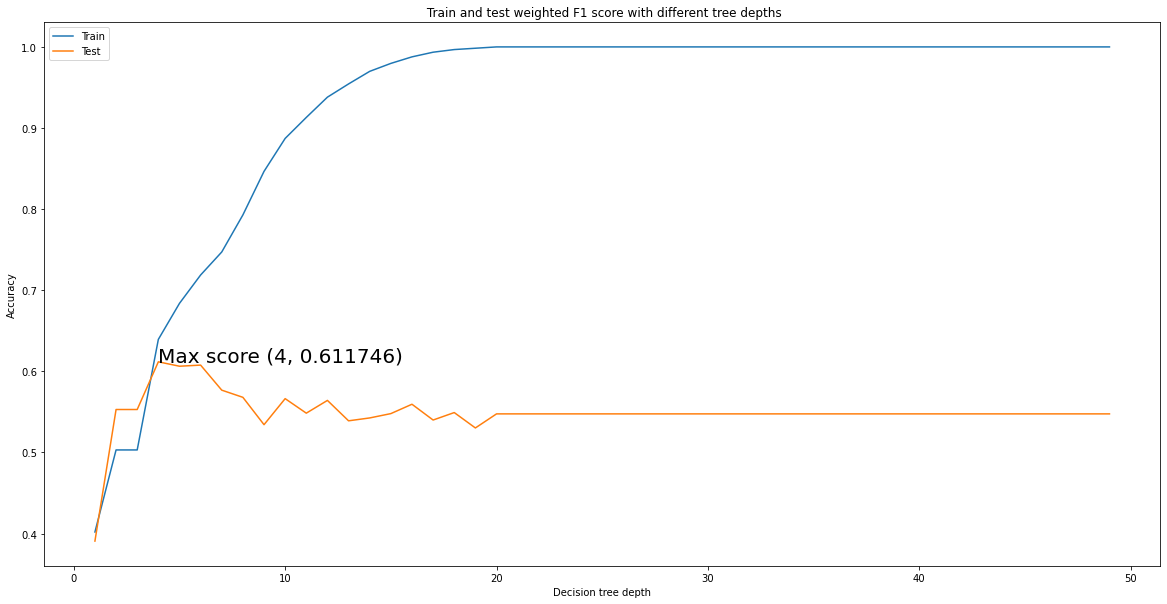

In [376]:

D_test = dict()
D_train = dict()


max_depth = 50

for depth in range(1,max_depth):

    clf = tree.DecisionTreeClassifier(max_depth= depth,random_state=seed)

    clf.fit(X_train, y_train)    

    y_pred = clf.predict(X_test)

    score_train = f1_score(y_train,clf.predict(X_train),  average='weighted')
    score_test = f1_score( y_test,y_pred, average='weighted')

    # score_train = balanced_accuracy_score(y_train,clf.predict(X_train))
    # score_test = balanced_accuracy_score(y_test,y_pred)

    # score_train = sum(clf.predict(X_train) == y_train) / len(y_train)
    # score_test = sum(y_pred == y_test) / len(y_test)


    D_test[depth] = score_test
    D_train[depth] = score_train

plt.subplots(figsize=(20, 10))

plt.plot( list(D_train.keys()), list(D_train.values()),label = "Train")

plt.plot( list(D_test.keys()), list(D_test.values()),label = "Test")



plt.xlabel('Decision tree depth')
plt.ylabel('Accuracy')
# Set a title of the current axes.
plt.title(' Train and test weighted F1 score with different tree depths')
# show a legend on the plot
plt.legend()

best_depth = max(D_test, key=D_test.get)
best_score = D_test[best_depth]


plt.text(best_depth,best_score, 'Max score ({}, {:.6f})'.format(best_depth,best_score),fontsize=20)

plt.show()

In [377]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns

# CLASSIFICATION REPORT

''' 
Precision – Accuracy of positive predictions.
Precision = TP/(TP + FP)

Recall: Fraction of positives that were correctly identified.
Recall = TP/(TP+FN)

F1 score is a weighted harmonic mean of precision and recall
F1 Score = 2*(Recall * Precision) / (Recall + Precision)
'''


clf_decision_tree = tree.DecisionTreeClassifier(max_depth= best_depth,random_state=seed)
clf_decision_tree.fit(X_train, y_train)
y_pred = clf_decision_tree.predict(X_test)

print('\n'+classification_report(y_test, y_pred, target_names=targets))

print("Weighted F1 score:", f1_score(y_test, y_pred, average='weighted')) 
print("Balanced accuracy:", balanced_accuracy_score(y_test,y_pred))
print("Accuracy:",sum(y_pred == y_test) / len(y_test))




              precision    recall  f1-score   support

        draw       0.61      0.57      0.59       137
        home       0.73      0.59      0.65       181
        away       0.47      0.70      0.57        90

    accuracy                           0.61       408
   macro avg       0.60      0.62      0.60       408
weighted avg       0.63      0.61      0.61       408

Weighted F1 score: 0.6117464165579104
Balanced accuracy: 0.6201677622293019
Accuracy: 0.6078431372549019


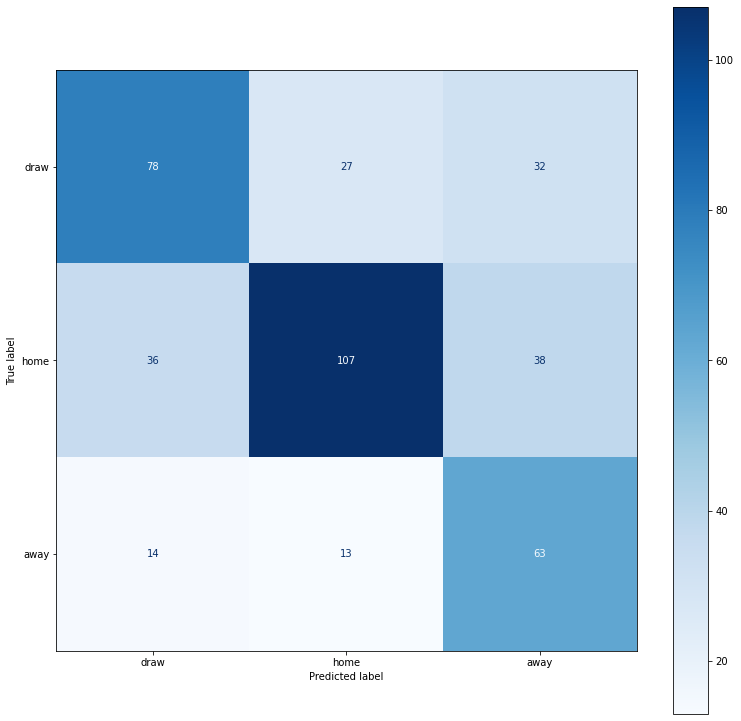

In [378]:
# CONFUSION MATRIX

from sklearn.metrics import plot_confusion_matrix
fig, ax = plt.subplots(figsize=(13, 13))
plot_confusion_matrix(clf_decision_tree, X_test, y_test,
                                 display_labels=targets,
                                 cmap=plt.cm.Blues,
                                 ax=ax)

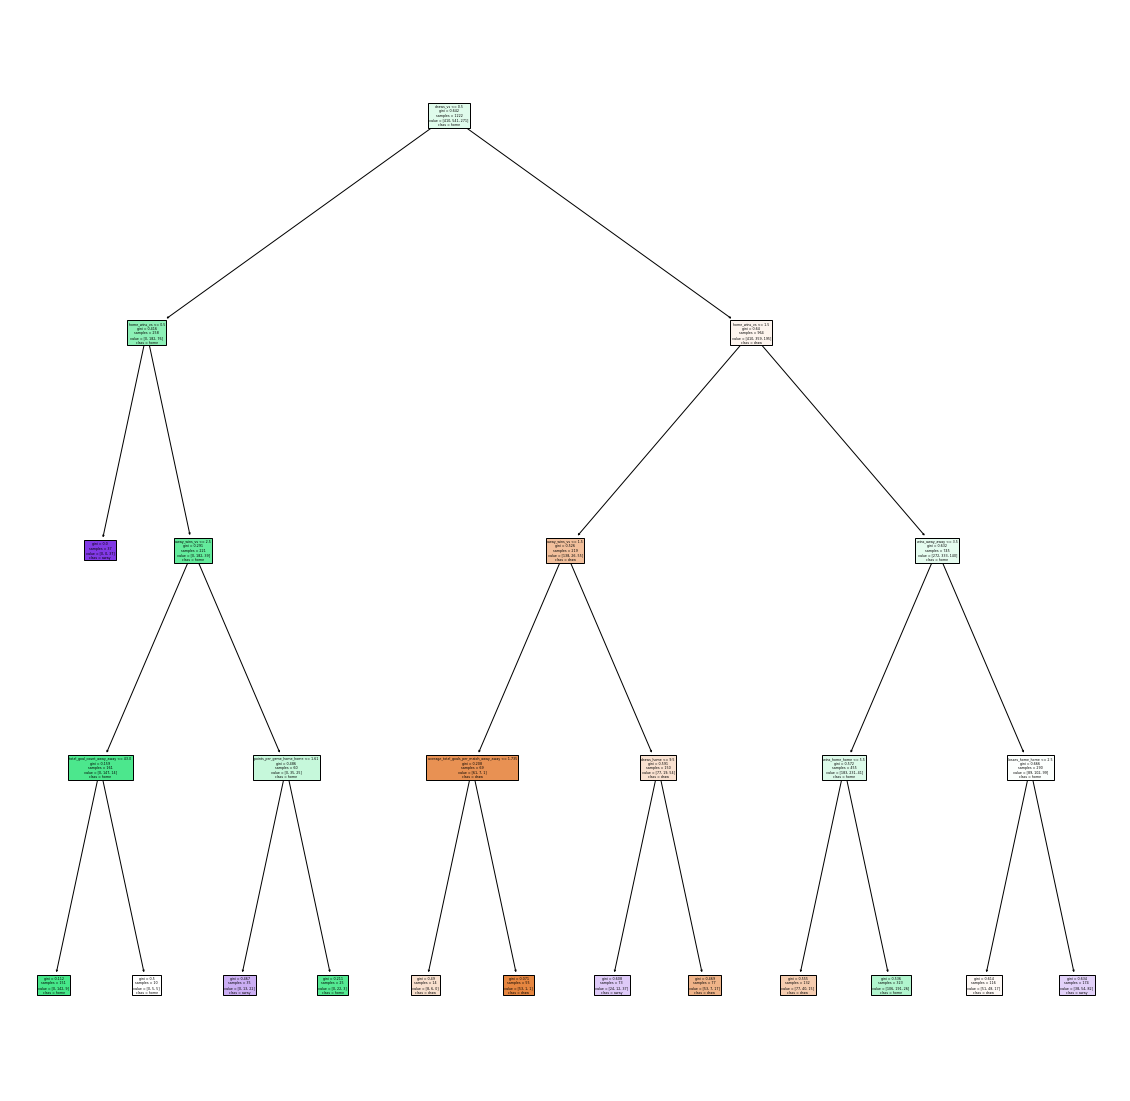

In [379]:

# DECISION TREE PLOT

fig = plt.figure(figsize=(20,20))
_ = tree.plot_tree(clf_decision_tree, 
                feature_names=X.columns,  
                class_names=targets,
                filled=True)

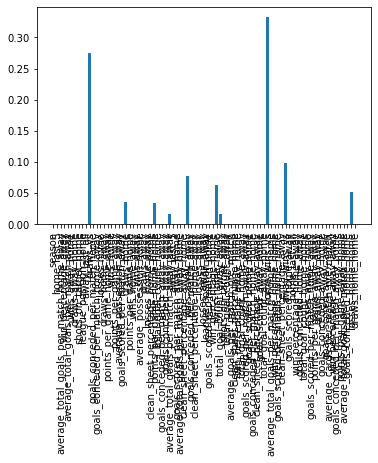

In [380]:

features = X.columns
importances = dict( zip(features,clf_decision_tree.feature_importances_))

plt.bar(*zip(*importances.items()))
plt.xticks( rotation='vertical')
plt.show()

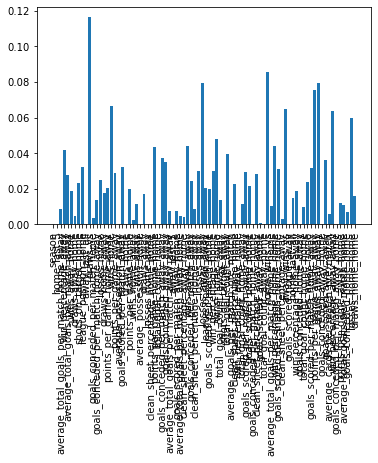

In [381]:
from sklearn.feature_selection import mutual_info_classif

res = dict(zip(features, mutual_info_classif(X, y) ))

plt.bar(*zip(*res.items()))
plt.xticks( rotation='vertical')
plt.show()

## Random forest

In [382]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification


clf_random_forest = RandomForestClassifier(max_depth=best_depth)

clf_random_forest.fit(X_train, y_train)

y_pred = clf_random_forest.predict(X_test)

# ACCURACY

accuracy = sum ( y_pred == y_test) / len(y_test)
print("Test accuracy : ",accuracy)


Test accuracy :  0.6200980392156863


In [383]:

# CLASSIFICATION REPORT

''' 
Precision – Accuracy of positive predictions.
Precision = TP/(TP + FP)

Recall: Fraction of positives that were correctly identified.
Recall = TP/(TP+FN)

F1 score is a weighted harmonic mean of precision and recall
F1 Score = 2*(Recall * Precision) / (Recall + Precision)
'''

print('\n'+classification_report(y_test, y_pred, target_names=targets))


              precision    recall  f1-score   support

        draw       0.64      0.53      0.58       137
        home       0.63      0.79      0.70       181
        away       0.55      0.42      0.48        90

    accuracy                           0.62       408
   macro avg       0.61      0.58      0.59       408
weighted avg       0.62      0.62      0.61       408



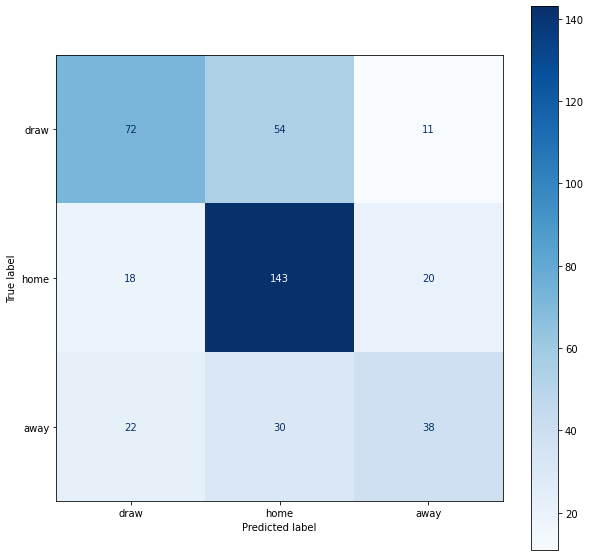

In [384]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(clf_random_forest, X_test, y_test,
                                 display_labels=targets,
                                 cmap=plt.cm.Blues,
                                 ax=ax)

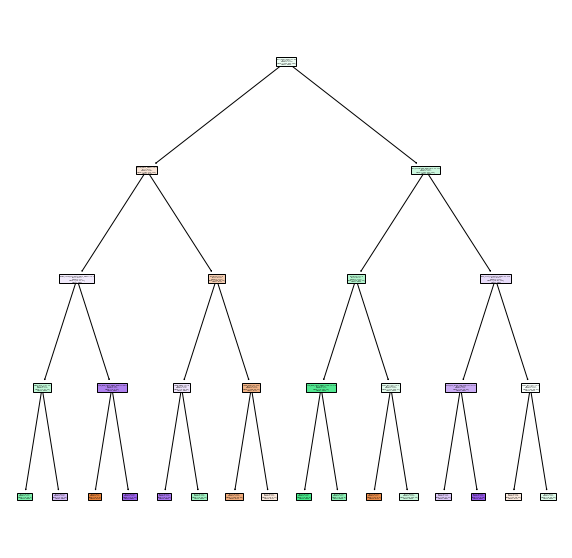

In [385]:
# Plotting fisrt decision tree of the ensemble

decision_tree = clf_random_forest.estimators_[0]

fig = plt.figure(figsize=(10,10))
_ = tree.plot_tree(decision_tree, 
                feature_names=X.columns,  
                class_names=['draw','home','away'],
                filled=True)

## Cross-validation

In [386]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth': range(3,20) }

clf = GridSearchCV(tree.DecisionTreeClassifier(),
                   param_grid = parameters, 
                   n_jobs=-1, # -1 to use all threads
                   verbose=5)

clf.fit(X_train,y_train)

tree_model = clf.best_estimator_

time.sleep(1)
print()

print ("Best score: ",clf.best_score_,", best parameters: ", clf.best_params_) 

y_pred = clf.predict(X_test)

# ACCURACY

accuracy = sum ( y_pred == y_test) / len(y_pred)
print("Test accuracy: ",accuracy)


Fitting 5 folds for each of 17 candidates, totalling 85 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  52 out of  85 | elapsed:    0.7s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  85 out of  85 | elapsed:    0.9s finished

Best score:  0.5908297089327534 , best parameters:  {'max_depth': 5}
Test accuracy:  0.6053921568627451


In [387]:
# CLASSIFICATION REPORT

''' 
Precision – Accuracy of positive predictions - axis 1 on the confusion matrix
Precision = TP/(TP + FP)

Recall: Fraction of positives that were correctly identified - axis 0 on the confusion matrix
Recall = TP/(TP+FN)

F1 score is a weighted harmonic mean of precision and recall
F1 Score = 2*(Recall * Precision) / (Recall + Precision)
'''

print('\n'+classification_report(y_test, y_pred, target_names=['draw','home','away']))


              precision    recall  f1-score   support

        draw       0.65      0.54      0.59       137
        home       0.68      0.62      0.65       181
        away       0.47      0.67      0.55        90

    accuracy                           0.61       408
   macro avg       0.60      0.61      0.60       408
weighted avg       0.62      0.61      0.61       408



## Prediction on new matches 

In [388]:
data_uncomplete = data[ data.status == 'incomplete' ]

In [389]:
team = "Raja Casablanca"

data_predict = data_uncomplete[( data_uncomplete.home_team_name == team ) | (data_uncomplete.away_team_name == team)]

In [390]:
data_predict

,season,home_team_goal_count,average_cards_per_match_pre_match,away_team_name,status,home_team_name,stadium_name,date_GMT,average_goals_per_match_pre_match,away_team_goal_count,...,goals_conceded_away_away,clean_sheet_percentage_away,result,home_wins_vs,away_wins_vs,draws_vs,home_last_5,away_last_5,home_last_all,away_last_all
1669,2020,0,4.51,Difaâ El Jadida,incomplete,Raja Casablanca,NaN,2020-09-20 21:00:00,2.01,0,...,12,36,0,5,5,1,6,2,94,73
1674,2020,0,2.70,Raja Casablanca,incomplete,Wydad Casablanca,NaN,2020-09-24 19:00:00,2.37,0,...,9,48,0,3,4,3,4,6,103,94
1677,2020,0,4.42,Rapide Oued Zem,incomplete,Raja Casablanca,NaN,2020-09-27 19:00:00,1.80,0,...,11,38,0,2,1,1,6,2,94,23


In [391]:
X_pred = data_predict[learning_columns].drop(['result'],1)

In [392]:
y_pred = clf_random_forest.predict(X_pred)
y_proba = clf_random_forest.predict_proba(X_pred)

In [393]:
targets_pred = pd.concat( [ pd.Series([targets[pred] for pred in y_pred]).rename('Result') , pd.Series(np.max(y_proba,axis=1)).rename('Certainty') ],axis=1)
data_pred = data_predict.loc[:,['home_team_name','away_team_name']].reset_index()


In [394]:
y_proba

array([[0.30587569, 0.55839118, 0.13573313],
       [0.38293034, 0.29132748, 0.32574218],
       [0.24470688, 0.64988771, 0.10540541]])

### Predictions (12/09/2020)

In [395]:
pd.concat([data_pred , pd.DataFrame(targets_pred)], axis=1).loc[:,['home_team_name','away_team_name','Result','Certainty']]

,home_team_name,away_team_name,Result,Certainty
0,Raja Casablanca,Difaâ El Jadida,home,0.558391
1,Wydad Casablanca,Raja Casablanca,draw,0.382930
2,Raja Casablanca,Rapide Oued Zem,home,0.649888
